In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

ls: cannot access '/content/drive/My Drive/': No such file or directory


In [ ]:
import os

path = "/content/drive/My Drive/fashion_images"
if os.path.exists(path):
    print("Folder found!")
else:
    print("Folder NOT found. Check the path!")


Folder NOT found. Check the path!


In [ ]:
import os

image_dir = "/content/drive/My Drive/images_new"  # Use full path

if os.path.exists(image_dir):
    filenames = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]
else:
    print(f"Error: The directory '{image_dir}' does not exist.")


Error: The directory '/content/drive/My Drive/images_new' does not exist.


In [ ]:
image_dir = "/content/drive/My Drive/Dataset/images_new"


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import os

file_path =  "/content/drive/My Drive/sample/Screenshot 2025-02-03 002905.png"
img = image.load_img(file_path, target_size=(224,224))


if os.path.exists(file_path):
    print("File found! Proceeding with loading...")
    img = image.load_img(file_path, target_size=(224,224))
else:
    print(f"Error: File '{file_path}' not found. Check the path!")


File found! Proceeding with loading...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# feature extraction from all the images
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from numpy.linalg import norm         # linalg = linear algebra
import os
from tqdm import tqdm
import pickle
from google.colab import files

# Load pre-trained ResNet50 model
#want weights trained on imagenet. add our own top layer. In transfer learning , it is the standard size of image. It's resolution decreases.
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False  # we are not training our model

model = tensorflow.keras.Sequential([
    model, # use resnet 50 module
    GlobalMaxPooling2D()   # add our own layer
])

# Function to extract features from an image
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))  # utility in image to bring the image in your environment if you specify the path.
    img_array = image.img_to_array(img) # converting to numpy array
    expanded_img_array = np.expand_dims(img_array, axis=0)  # pass image aaray (3D TO 4D array_> to represent batch of images  ). It works on batch of images
    preprocessed_img = preprocess_input(expanded_img_array) #in resnet -> preprocessor_input -> convert the work whatever you have given to resnet to correct format.
    result = model.predict(preprocessed_img).flatten()  # get numpy array as [1, 2048] since only 1 image is there. Flatten is used to convert to 1d shape=[2048]
    normalized_result = result / norm(result) # normalize to bring value between 0 and 1
    # divide by l2 norm .
    return normalized_result

# Prompt user to upload files
uploaded_files = files.upload()

filenames = list(uploaded_files.keys())  # Get uploaded filenames
feature_list = [] # 2D list  [[2048] , [2048] , -----]  1 for each image 2048 features

# Extract features from uploaded images
for file in tqdm(filenames):       # as many files that much time loop will run
    feature_list.append(extract_features(file, model))
# for each file extract its features by passing file path and store it to feature list made earlier.
#shape of each list = (columns = 2048 row = no. of files )
# tqdm to track the loop that how much work is done and how much is remainning

# Save extracted features and filenames
pickle.dump(feature_list, open('embeddings.pkl', 'wb'))    #'embeddingd.pkl' is the file name which is in write binary mode.
pickle.dump(filenames, open('filenames.pkl', 'wb'))        # exported to a file so that we can use it anywhere.

print("Feature extraction complete. Files saved as 'embeddings.pkl' and 'filenames.pkl'")


Saving download (1).jpeg to download (1) (1).jpeg
Saving download (2).jpeg to download (2) (1).jpeg
Saving download (3).jpeg to download (3) (1).jpeg
Saving download (4).jpeg to download (4) (1).jpeg
Saving download (5).jpeg to download (5) (1).jpeg
Saving download (6).jpeg to download (6) (1).jpeg
Saving download (7).jpeg to download (7) (1).jpeg
Saving download (8).jpeg to download (8) (1).jpeg
Saving download (9).jpeg to download (9) (1).jpeg
Saving download (10).jpeg to download (10) (1).jpeg
Saving download (11).jpeg to download (11) (1).jpeg
Saving download (12).jpeg to download (12) (1).jpeg
Saving download (13).jpeg to download (13) (1).jpeg
Saving download (14).jpeg to download (14) (1).jpeg
Saving download (15).jpeg to download (15) (1).jpeg
Saving download (16).jpeg to download (16) (1).jpeg
Saving download (17).jpeg to download (17) (1).jpeg
Saving download (18).jpeg to download (18) (1).jpeg
Saving download (19).jpeg to download (19) (1).jpeg
Saving download (20).jpeg to d

  0%|          | 0/80 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  1%|▏         | 1/80 [00:02<03:47,  2.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▎         | 2/80 [00:03<01:49,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  4%|▍         | 3/80 [00:03<01:11,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  5%|▌         | 4/80 [00:04<00:54,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▋         | 5/80 [00:04<00:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  8%|▊         | 6/80 [00:04<00:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  9%|▉         | 7/80 [00:05<00:33,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 10%|█         | 8/80 [00:05<00:28,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 11%|█▏        | 9/80 [00:05<00:26,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 12%|█▎        | 10/80 [00:06<00:26,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 14%|█▍        | 11/80 [00:06<00:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 15%|█▌        | 12/80 [00:07<00:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 16%|█▋        | 13/80 [00:07<00:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 18%|█▊        | 14/80 [00:08<00:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 19%|█▉        | 15/80 [00:09<00:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 20%|██        | 16/80 [00:09<00:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 21%|██▏       | 17/80 [00:10<00:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 22%|██▎       | 18/80 [00:10<00:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 24%|██▍       | 19/80 [00:10<00:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 25%|██▌       | 20/80 [00:11<00:24,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 26%|██▋       | 21/80 [00:11<00:22,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 28%|██▊       | 22/80 [00:11<00:22,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 29%|██▉       | 23/80 [00:12<00:22,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 30%|███       | 24/80 [00:12<00:20,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|███▏      | 25/80 [00:12<00:19,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 32%|███▎      | 26/80 [00:13<00:17,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 34%|███▍      | 27/80 [00:13<00:16,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 35%|███▌      | 28/80 [00:13<00:17,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 36%|███▋      | 29/80 [00:14<00:16,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 38%|███▊      | 30/80 [00:14<00:17,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███▉      | 31/80 [00:15<00:17,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 40%|████      | 32/80 [00:15<00:17,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 41%|████▏     | 33/80 [00:15<00:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 42%|████▎     | 34/80 [00:16<00:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 44%|████▍     | 35/80 [00:16<00:16,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 45%|████▌     | 36/80 [00:16<00:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 46%|████▋     | 37/80 [00:17<00:16,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 48%|████▊     | 38/80 [00:17<00:15,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 49%|████▉     | 39/80 [00:18<00:15,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 50%|█████     | 40/80 [00:18<00:15,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 51%|█████▏    | 41/80 [00:18<00:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 52%|█████▎    | 42/80 [00:19<00:13,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 54%|█████▍    | 43/80 [00:19<00:13,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 55%|█████▌    | 44/80 [00:20<00:16,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 56%|█████▋    | 45/80 [00:20<00:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 57%|█████▊    | 46/80 [00:21<00:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 59%|█████▉    | 47/80 [00:22<00:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 60%|██████    | 48/80 [00:22<00:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 61%|██████▏   | 49/80 [00:22<00:14,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 62%|██████▎   | 50/80 [00:23<00:12,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 64%|██████▍   | 51/80 [00:23<00:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 65%|██████▌   | 52/80 [00:23<00:10,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 66%|██████▋   | 53/80 [00:24<00:10,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 68%|██████▊   | 54/80 [00:24<00:09,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 69%|██████▉   | 55/80 [00:24<00:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 70%|███████   | 56/80 [00:25<00:08,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 71%|███████▏  | 57/80 [00:25<00:08,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 72%|███████▎  | 58/80 [00:25<00:08,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 74%|███████▍  | 59/80 [00:26<00:07,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 75%|███████▌  | 60/80 [00:26<00:07,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|███████▋  | 61/80 [00:27<00:07,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|███████▊  | 62/80 [00:27<00:06,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 79%|███████▉  | 63/80 [00:27<00:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 80%|████████  | 64/80 [00:28<00:05,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 81%|████████▏ | 65/80 [00:28<00:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 82%|████████▎ | 66/80 [00:28<00:05,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 84%|████████▍ | 67/80 [00:29<00:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 85%|████████▌ | 68/80 [00:29<00:04,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 86%|████████▋ | 69/80 [00:29<00:04,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 88%|████████▊ | 70/80 [00:30<00:03,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 89%|████████▉ | 71/80 [00:30<00:03,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 90%|█████████ | 72/80 [00:31<00:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 91%|█████████▏| 73/80 [00:31<00:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 92%|█████████▎| 74/80 [00:31<00:02,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 94%|█████████▍| 75/80 [00:32<00:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 95%|█████████▌| 76/80 [00:32<00:01,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 96%|█████████▋| 77/80 [00:33<00:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 98%|█████████▊| 78/80 [00:34<00:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 99%|█████████▉| 79/80 [00:34<00:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


100%|██████████| 80/80 [00:35<00:00,  2.25it/s]

Feature extraction complete. Files saved as 'embeddings.pkl' and 'filenames.pkl'


Saving images.jpeg to images (23).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Recommended Images: [[41 38 45 43 39 44]]


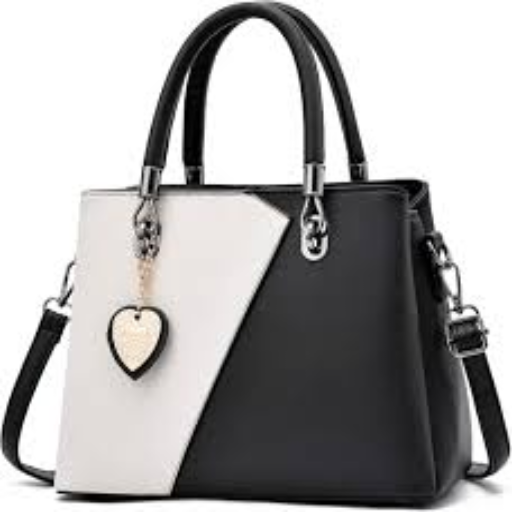

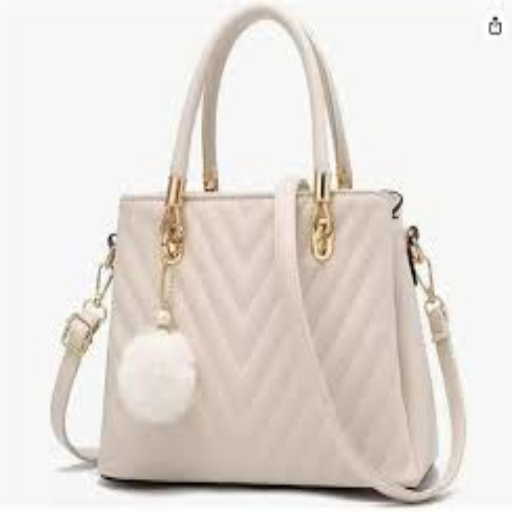

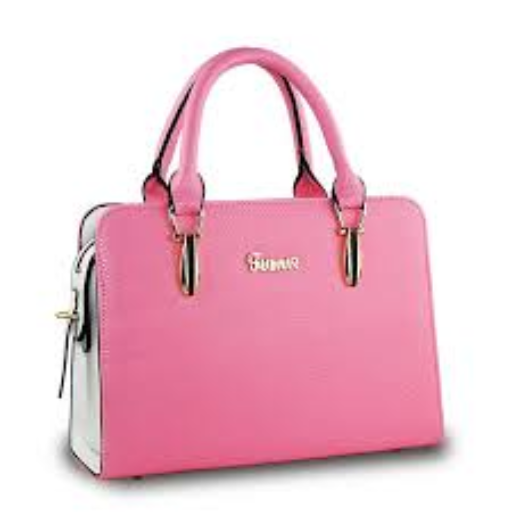

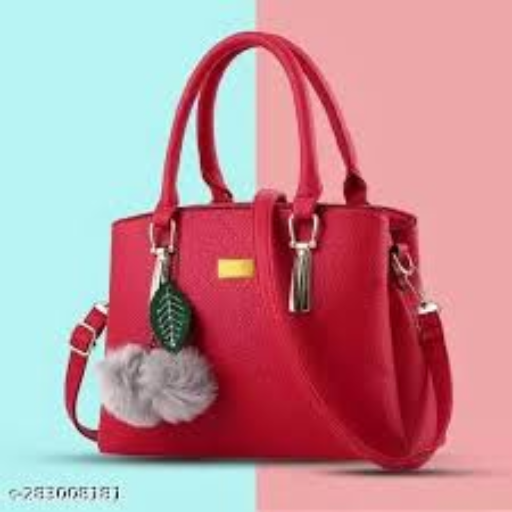

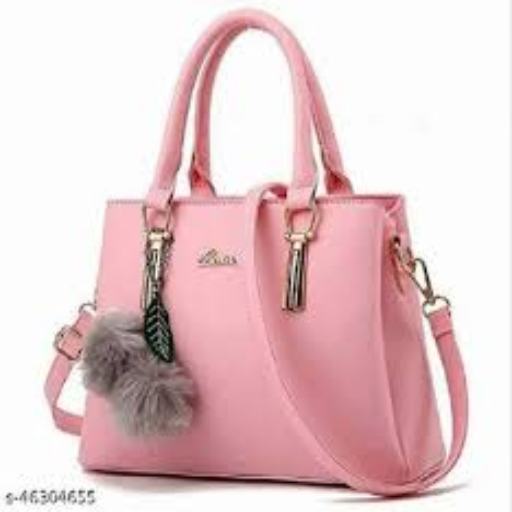

In [3]:
#bring new image and compare it with features of all the files. test the model
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow
import cv2
from google.colab import files

# Load precomputed features and filenames
feature_list = np.array(pickle.load(open('embeddings.pkl', 'rb')))   # import feature and filenames
filenames = pickle.load(open('filenames.pkl', 'rb'))

# Load ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False
# we can also export our model but we are having tensorflow
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

# Step 1: Upload image manually
uploaded = files.upload()

# Step 2: Get uploaded file path
uploaded_filename = list(uploaded.keys())[0]  # Get the uploaded file name

# Step 3: Process the uploaded image
img = image.load_img(uploaded_filename, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

# Step 4: Find similar images
# calcilatr distance between normalised result and feature list
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
# have to find 6 neighboures becoz 1st recommendation is the image itself.
# algorithm is brute force becoz data not very large
# euclidean distance is calculated.
neighbors.fit(feature_list)# give input data (collection of data)

distances, indices = neighbors.kneighbors([normalized_result]) #return distances and indices
# 5 nearest neighbours to calculate based on this algo on top of normalized result

print("Recommended Images:", indices)

#from the indices get the images. 2d array
# Step 5: Display recommended images
for file in indices[0][1:6]:  # Skipping the first because it's the query image itself
    temp_img = cv2.imread(filenames[file])
    if temp_img is not None:
        temp_img_resized = cv2.resize(temp_img, (512, 512)) #parameter = thing to resize , size in which want to resize
        cv2_imshow(temp_img_resized) # to display
    else:
        print(f"Error loading image: {filenames[file]}")


In [ ]:
# convert it to streamlit website so that if anybody upload image there then we can provide recommendations.
import streamlit as st
import os
from PIL import Image
import numpy as np
import pickle
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

st.title('Fashion Recommender System')

#steps
#file upload -> save
#load file -> extract feature
# recommendation
# show

def save_uploaded_file(uploaded_file):          # to save our file in the folder we are working
    try:
        with open(os.path.join('uploads',uploaded_file.name),'wb') as f:    # uploads is the folder in which we want our file
            f.write(uploaded_file.getbuffer())
        return 1
    except:
        return 0

def feature_extraction(img_path,model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])     # in place of normalized result , print features

    return indices

# steps
# file upload -> save
uploaded_file = st.file_uploader("Choose an image")  # built in function to upload file
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):        # file has been uploaded
        # display the file
        display_image = Image.open(uploaded_file)
        st.image(display_image) # display the image by importing PIL(Python Imaging Library ) library
        # feature extract
        features = feature_extraction(os.path.join("uploads",uploaded_file.name),model) # have to send the path of the file
        #st.text(features)      # to print features
        # recommendention
        indices = recommend(features,feature_list)
        # show
        col1,col2,col3,col4,col5 = st.beta_columns(5)  # to display recommendations(need 5 col)

        with col1:
            st.image(filenames[indices[0][0]])
        with col2:
            st.image(filenames[indices[0][1]])
        with col3:
            st.image(filenames[indices[0][2]])
        with col4:
            st.image(filenames[indices[0][3]])
        with col5:
            st.image(filenames[indices[0][4]])
    else:
        st.header("Some error occured in file upload")

2025-02-03 05:39:15.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-03 05:39:15.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-03 05:39:15.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-03 05:39:15.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-03 05:39:15.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-03 05:39:15.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-03 05:39:15.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!pip install streamlit



* It is called reverse imaage search.
* It groups visually similar images.


*   Deep learning is used
*   CNN is used


*   Transfer learning is used -> use already trained data using ResNET module.
On imagenet(dataset)  this module is already trained.



* [ PLAN OF ATTACK ](`https://`)

*   Import model -> ResNET module is a CNN model  which is built in Keras module.

*   Extract features -> We send our images to Resnet and then it extract the features of image(2048 for each image in our database) . When we will give our sample image then it will extract its features also.  


*   Export features -> save the features of each image in our database in the form of 2048 dimensional array(array of each image will contain 2048 elements)



*   Generate recommendations -> It will compare the array of sample image(containg 2048 elements) with all the stored arrays and calculate uclidean distance and based on that give our nearest neighbours in the recommendation.  


*  In CNN model, there are differnt layers and the image pass through each layer and each layer perform some specific task like one layer will determine colour, etc














In [3]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensor.keras.layers import GlobalMaxPooling2D
from tensor.keras.application.resnet50 import resNet50 , preprocess_input
import os
import pickle
import numpy as np
import numpy.linalg as norm
from google.colab import files

model = resNet50(weights = 'imagenet' , include_top = False , input_shape(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([model , GlobalMaxPooling2D()])

upload_file = files.upload()

filenames = list(upload_file.keys())


def extract_features(img_path , model) :
  img = image.img_load(img_path , target_size = (224,224))
  img_array = img_to_array(img)
  img_expanded = np.expand_dims(img_array , axis = 0)
  img_processed = process_input(img_expanded)
  result = model.predict(img_processes)
  normalised_result = result / norm(result)

  return normalised_result


feature_list = []

for file in filenames :
  feature_list.append(extract_features(file , model))

pickle.dump(filenames , 'filenames.pkl' , 'wb')
pickle.dump(feature_list , 'embeddings.pkl', 'wb')



SyntaxError: positional argument follows keyword argument (<ipython-input-3-2bcc4445d1fb>, line 11)